# Domain Architecture and Evolution of RRNPP Proteins

Welcome! In this notebook, you will analyze the domain architecture and evolutionary relationships of the RRNPP family of quorum sensing proteins, following the workflow from [this preprint](https://www.biorxiv.org/content/10.1101/2023.09.19.558401v2).

## Objectives
- **Introduction to RRNPP proteins:** Review their roles and domain organization.
- **Domain architecture analysis:** Compare sequences and define core, N-terminal, and C-terminal regions.
- **Homology clustering:** Group and visualize similar regions using graph-based methods.
- **Phylogenetic analysis:** Build and annotate a tree based on core regions.
- **Evolutionary inference:** Map and interpret domain architecture transitions.

## Workflow Overview
1. Introduction to RRNPP proteins
2. Domain architecture analysis
3. Homology clustering
4. Phylogenetic analysis
5. Evolutionary inference and discussion

---

Let's get started!

In [1]:
cd projects/Structural_evo_tutorial/Structural_evo_tutorial/

/home/dmoi/projects/Structural_evo_tutorial/Structural_evo_tutorial


In [2]:
# lets load some functions from foldtree
from fold_tree.src.corecut import *
from fold_tree.src.foldseek2tree import *
from fold_tree.src.AFDB_tools import *

To study the evolutionary history of RRNPP proteins, we will first explore their domain architecture. RRNPP proteins are known to contain a conserved core region, typically associated with their function in quorum sensing. The domain architecture can vary significantly among different RRNPP family members, and understanding these variations is crucial for inferring evolutionary relationships.

First we will visualize some examples.


In [3]:
import glob
rrnppa_structures = glob.glob( 'rrnppa/*.pdb')
uniprotids = [ s.split('/')[-1].split('.')[0] for s in rrnppa_structures ]
print( len(uniprotids)  , 'structures found' )
print( uniprotids[0:5] , '...' )

768 structures found
['A0A2Z4MR52', 'S6FLN1', 'A0A075RCM7', 'A0A7Z2J5F3', 'A0A410DTG4'] ...


In [4]:
import py3Dmol
import glob

# Lets look at some structures with diverse architectures
# List PDB files in the current directory

# Visualize the first 3 structures (if available)
for pdb_file in rrnppa_structures[:3]:
	print(f"Visualizing {pdb_file}")
	with open(pdb_file, 'r') as f:
		pdb_data = f.read()
	view = py3Dmol.view(width=400, height=300)
	view.addModel(pdb_data, 'pdb')
	view.setStyle({'cartoon': {'color': 'spectrum'}})
	view.zoomTo()
	display(view)

Visualizing rrnppa/A0A2Z4MR52.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Visualizing rrnppa/S6FLN1.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Visualizing rrnppa/A0A075RCM7.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
from Bio.PDB import Superimposer, PDBParser
from Bio.PDB import PDBIO
import tempfile
import py3Dmol

def rigid_body_align(structure_path1, structure_path2, chain_id1='A', chain_id2='A'):
	"""
	Align two protein structures using rigid body superposition.

	Returns:
		rmsd (float): Root mean square deviation after alignment.
		super_imposer (Superimposer): Biopython Superimposer object.
		structure1, structure2: Biopython Structure objects (structure2 is superposed).
		view (py3Dmol.view): py3Dmol view showing the superposed structures.
	"""
	parser = PDBParser(QUIET=True)
	structure1 = parser.get_structure('struct1', structure_path1)
	structure2 = parser.get_structure('struct2', structure_path2)

	atoms1 = [atom for atom in structure1[0].get_atoms() if atom.get_id() == 'CA']
	atoms2 = [atom for atom in structure2[0].get_atoms() if atom.get_id() == 'CA']

	min_len = min(len(atoms1), len(atoms2))
	atoms1 = atoms1[:min_len]
	atoms2 = atoms2[:min_len]

	sup = Superimposer()
	sup.set_atoms(atoms1, atoms2)
	sup.apply(structure2.get_atoms())

	# Save structures to temp files for visualization
	io = PDBIO()
	# structure1
	tmp1 = tempfile.NamedTemporaryFile(delete=False, suffix='.pdb')
	io.set_structure(structure1)
	io.save(tmp1.name)
	# structure2 (already superposed)
	tmp2 = tempfile.NamedTemporaryFile(delete=False, suffix='.pdb')
	io.set_structure(structure2)
	io.save(tmp2.name)

	# Visualize with py3Dmol
	with open(tmp1.name) as f1, open(tmp2.name) as f2:
		pdb1 = f1.read()
		pdb2 = f2.read()
	view = py3Dmol.view(width=600, height=400)
	view.addModel(pdb1, 'pdb')
	view.setStyle({'model': 0}, {'cartoon': {'color': 'spectrum'}})
	view.addModel(pdb2, 'pdb')
	view.setStyle({'model': 1}, {'cartoon': {'color': 'magenta'}})
	view.zoomTo()
	return sup.rms, sup, structure1, structure2, view


## Inspecting RRNPP Protein Pairs: Evolutionary Complexity and Structural Diversity

### Introduction

In this section, we will inspect pairs of RRNPP proteins, following an approach similar to the fsx1 example. The RRNPP family is notable for its complex evolutionary history, which is shaped by frequent domain architecture changes and horizontal gene transfer events. These processes contribute to the remarkable diversity observed within this protein family and complicate efforts to reconstruct their evolutionary relationships.

### Biological Background

Once a quorum of cells, plasmids, or viruses is reached, communication peptides are often internalized and bind to the tetratricopeptide repeats (TPRs) of their cognate intracellular receptors. This interaction can activate or inhibit gene or protein expression, enabling a coordinated response that benefits dense microbial populations. RRNPP systems regulate a wide range of behaviors, including:

- **Bacterial virulence**
- **Biofilm formation**
- **Sporulation**
- **Competence**
- **Conjugation**
- **Bacteriophage lysis/lysogeny decisions**

### Challenges in Evolutionary Analysis

Although RRNPP receptors were first identified in the early 1990s, their evolutionary history remains unclear. Frequent mutations and horizontal gene transfers obscure sequence-based comparisons, making it difficult to trace their origins using traditional methods. The family name, RRNPPA, reflects its historical classification into six different receptor families—Rap, Rgg, NprR, PlcR, PrgX, and AimR. Only through detailed structural comparisons has their shared evolutionary origin been established.

### Why Structure Matters

The structural diversity of RRNPP proteins, especially in their N- and C-terminal regions, highlights the importance of focusing on conserved core domains for evolutionary inference. By comparing pairs of structures, we can better appreciate the impact of domain shuffling and horizontal transfer on protein evolution, and understand why structure-based approaches are essential for resolving deep evolutionary relationships in such complex families.

In [6]:
# again, let's try some structure pairs
import itertools
import random
combos = [ ( i, j ) for i, j in itertools.combinations(range(len(rrnppa_structures)), 2) ]
sample = random.sample(combos, 5)
for i, j in sample:
	print( i, j, rrnppa_structures[i], rrnppa_structures[j] )
	rms, sup, structure1, structure2, view = rigid_body_align(rrnppa_structures[i], rrnppa_structures[j])
	view.show()
	print( 'RMSD:', rms)
# The above code will align the first two structures in the list and print the RMSD.
# lets also save the aligned structures
sup.apply(structure2.get_atoms())
# Save the aligned structure


402 561 rrnppa/A0A679H258.pdb rrnppa/C2X5G2.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

RMSD: 6.903067285694566
184 592 rrnppa/A0A6I6UUP9.pdb rrnppa/C3BPR2.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

RMSD: 17.39629060833781
464 510 rrnppa/G9WIW9.pdb rrnppa/Q97KG2.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

RMSD: 10.545542401288703
6 562 rrnppa/A0A6I6I7J9.pdb rrnppa/A0A5C0WME3.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

RMSD: 20.11641098592908
23 245 rrnppa/Q6EZI3.pdb rrnppa/Q97TQ8.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

RMSD: 19.016410355838936


### Structural Diversity and Its Impact on Phylogenetic Inference

The RRNPP protein structures analyzed here exhibit a common core fold but display considerable diversity in their overall architectures. 

#### Consequences for Sequence and Structural Distances

- **Sequence Distances:** The inclusion of variable regions inflates sequence distances between proteins, as these regions may be highly divergent or even unrelated by descent.
- **Structural Distances:** Similarly, structural distances (e.g., RMSD) increase when comparing full-length proteins, as the variable regions contribute additional differences not present in the conserved core.
- **Phylogenetic Inference:** Using full-length sequences or structures as input for phylogenetic analysis can obscure true evolutionary relationships. The incongruence introduced by variable regions may lead to inaccurate trees, as the signal from the conserved core is diluted by noise from the divergent regions.

#### Best Practice

To obtain more accurate evolutionary insights, it is advisable to focus on the conserved core region shared by all members of the family. By extracting and analyzing only the core, one can reduce noise from variable regions and improve the reliability of sequence and structural comparisons, as well as downstream phylogenetic inference.

100%|█| 768/768 [00:26<00:00, 28.53it/s]


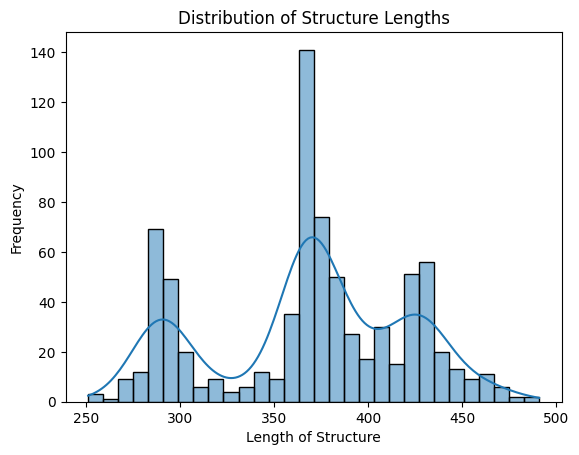

In [7]:
# Let's plot the lengths of all the structures
# we'll just read the sructures and count the residues

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Bio.PDB import PDBParser
import pandas as pd
import tqdm

lengths = []
for pdb_file in tqdm.tqdm(rrnppa_structures):
	# Parse the PDB file
	parser = PDBParser(QUIET=True)
	structure = parser.get_structure('PDB', pdb_file)
	# Calculate the length of the structure
	length = len(list(structure.get_residues()))
	# Store the length and filename in a list
	lengths.append(length )
# Convert the list to a DataFrame
sns.histplot(lengths, bins=30, kde=True)
plt.xlabel('Length of Structure')
plt.ylabel('Frequency')
plt.title('Distribution of Structure Lengths')
plt.show()

In [8]:
#let's get the uniprot metadata for the structures
#we'll use the AFDB tools to get the metadata
#It queries the Uniprot API to get some information about our proteins
structsIDs = { f.split('/')[-1].split('.')[0]: f.split('/')[-1].split('.')[0] for f in rrnppa_structures }
metadata_df = grab_entries( list(structsIDs.keys()) )
#let's add the file locations to the metadata
metadata_df['file'] = metadata_df['Entry'].map( lambda x: rrnppa_structures[uniprotids.index(x)] if x in uniprotids else None )

In [9]:
metadata_df

Entry Name       Entry                Gene Names  \
0    A0A075R5V6_BRELA  A0A075R5V6              BRLA_c028850   
1    A0A075R948_BRELA  A0A075R948              BRLA_c017660   
2    A0A075RCM7_BRELA  A0A075RCM7    rghR_10 BRLA_33p000110   
3    A0A0F7FGL9_PAEDU  A0A0F7FGL9                VK70_16540   
4    A0A0J6EBB4_9BACI  A0A0J6EBB4  AB447_212990 EQZ20_03685   
..                ...         ...                       ...   
467  A0A7S8CE02_9BACI  A0A7S8CE02               G8O30_15525   
468      A9KPE5_LACP7      A9KPE5                 Cphy_2859   
469      B9IXA1_BACCQ      B9IXA1             rapA BCQ_1883   
470      F8DHW7_STREP      F8DHW7          HMPREF0833_11864   
471      I0JSP6_HALH3      I0JSP6                HBHAL_4830   

                                         Protein names    Reviewed  \
0                      Helix-turn-helix domain protein  unreviewed   
1                      Helix-turn-helix domain protein  unreviewed   
2                                      RapGH repressor  unreviewed   
3            HTH cro/C1-type domain-containing protein  unreviewed   
4    Aspartate phosphatase (Tetratricopeptide repea...  unreviewed   
..                                                 ...         ...   
467         Helix-turn-helix transcriptional regulator  unreviewed   
468                    Helix-turn-helix domain protein  unreviewed   
469  Possible response regulator aspartate phosphatase  unreviewed   
470               DNA-binding helix-turn-helix protein  unreviewed   
471                NprR family transcription regulator  unreviewed   

                                       Protein names.1  \
0                      Helix-turn-helix domain protein   
1                      Helix-turn-helix domain protein   
2                                      RapGH repressor   
3            HTH cro/C1-type domain-containing protein   
4    Aspartate phosphatase (Tetratricopeptide repea...   
..                                                 ...   
467         Helix-turn-helix transcriptional regulator   
468                    Helix-turn-helix domain protein   
469  Possible response regulator aspartate phosphatase   
470               DNA-binding helix-turn-helix protein   
471                NprR family transcription regulator   

                                              Organism  \
0                 Brevibacillus laterosporus LMG 15441   
1                 Brevibacillus laterosporus LMG 15441   
2                 Brevibacillus laterosporus LMG 15441   
3                       Paenibacillus durus ATCC 35681   
4                           Bacillus glycinifermentans   
..                                                 ...   
467                          Mangrovibacillus cuniculi   
468  Lachnoclostridium phytofermentans (strain ATCC...   
469                        Bacillus cereus (strain Q1)   
470  Streptococcus parasanguinis (strain ATCC 15912...   
471  Halobacillus halophilus (strain ATCC 35676 / D...   

                               Taxonomic lineage (Ids)  \
0    131567 (no rank), 2 (superkingdom), 1783272 (k...   
1    131567 (no rank), 2 (superkingdom), 1783272 (k...   
2    131567 (no rank), 2 (superkingdom), 1783272 (k...   
3    131567 (no rank), 2 (superkingdom), 1783272 (k...   
4    131567 (no rank), 2 (superkingdom), 1783272 (k...   
..                                                 ...   
467  131567 (no rank), 2 (superkingdom), 1783272 (k...   
468  131567 (no rank), 2 (superkingdom), 1783272 (k...   
469  131567 (no rank), 2 (superkingdom), 1783272 (k...   
470  131567 (no rank), 2 (superkingdom), 1783272 (k...   
471  131567 (no rank), 2 (superkingdom), 1783272 (k...   

                                              Sequence       query  \
0    MVDSLTFTTLGELIRGKRADMGLSLSELGRMTGISKGVLSKIENDE...  A0A075R5V6   
1    MSVSLTFTTLGELIRKKRIEMGISLSELGRMIGISKGVLSKIESGD...  A0A075R948   
2    MKGLAFQYQTFGEGMRKRRQDKNLSLSQLSKMTGVSKGVISKIECG...  A0A075RCM7   
3    METYIREQGLTMQSFAEQAGVNRGTLSAIINRNPPRK

In [10]:
#we can mix these types of metadata with a phylogeny to study when certain features transitioned
#let's get the phylogeny of the rrnppa structures and add some taxonomic metadata
#we'll use the foldseek2tree function to get the phylogeny and the fitch algorithm to get the ancestral states
#of discrete characters

from fold_tree.src.foldseek2tree import *
from src.fitch import *


### Fitch-Sankoff Algorithm for Small Parsimony

The Fitch-Sankoff algorithm is a classic method for solving the small parsimony problem, which seeks the most parsimonious assignment of ancestral states for discrete characters on a fixed tree topology. The algorithm operates in two main passes:

1. **Bottom-Up Pass (Fitch's Algorithm):**  
	For each internal node, the algorithm computes the minimal set of possible states by considering the states of its child nodes. If the child sets intersect, the intersection is used; otherwise, the union is taken, and a change is counted.

2. **Top-Down Pass (Sankoff's Algorithm):**  
	Starting from the root, the algorithm assigns specific states to each node, choosing the most parsimonious options based on the sets computed in the bottom-up pass.

By tracing state transitions at internal nodes, we can infer where biologically meaningful changes—such as domain architecture transitions—occurred along the tree. This approach is particularly useful for mapping the evolutionary history of traits and identifying key innovations in protein families. In this example, we will apply the algorithm to track domain architecture changes across the phylogeny. go ahead take a look at the code in the src directory if this is something that's interesting to you.

In [11]:
#there are about 700 structures in the rrnppa folder
#this may take a while to run
import os
if not os.path.exists('rrnppa_foldtree'):
    os.makedirs('rrnppa_foldtree')

comparison , trees = structblob2tree(input_folder = 'rrnppa', outfolder = './' , foldseekpath = 'foldseek'  )
print( 'Foldseek comparison:', comparison )
print( 'Foldseek trees:', trees )

found foldseek output, skipping foldseek
             query      target  fident  alnlen  mismatch  gapopen  qstart  \
0       A0A2S1AH59  A0A2S1AH59   1.000     364         0        0       1   
1       A0A2S1AH59      C2SUH0   0.851     364        54        0       1   
2       A0A2S1AH59      C2URM8   0.826     364        63        0       1   
3       A0A2S1AH59  A0A7D3Y3L0   0.788     364        77        0       1   
4       A0A2S1AH59      Q735S3   0.631     364       134        0       1   
...            ...         ...     ...     ...       ...      ...     ...   
589679  A0A7D4F9I6  A0A1E1GA66   0.147     292       201       17       8   
589680  A0A7D4F9I6  A0A3S8RZW0   0.106     318       209       16      67   
589681  A0A7D4F9I6      Q7CC21   0.107     307       215       17       9   
589682  A0A7D4F9I6  A0A239XEA8   0.107     298       221       14       7   
589683  A0A7D4F9I6      G7VZS9   0.091     327       236       14      57   

        qend  tstart  tend        

## The CoreCut Approach
The CoreCut heuristic developped for our paper focuses on identifying and extracting a consensus "core" region shared among a group of related protein structures. By systematically removing variable N-terminal and C-terminal extensions, CoreCut isolates the structurally conserved segment, enabling more accurate comparative and evolutionary analyses. This method allows for domain-specific studies, reducing noise from divergent terminal regions and facilitating separate analyses for each group of structures based on their conserved cores.

The approach works by searching for regions within each structure that are well-aligned and consistently present across the rest of the dataset. For each structure, CoreCut evaluates which parts map to the majority of other structures. If a region is found to align above a certain threshold (for example, 80% of the dataset), it is considered part of the "core." This consensus-based strategy ensures that only the most conserved and structurally homologous segments are retained for downstream analysis, improving the reliability of evolutionary and functional inferences.

In [ ]:

extract_core(comparison , outfile= 'rrnppa_foldtree/cores.csv',  hitthresh = .8 ,minthresh = .6, corefolder = 'rrnppa_core_structs/' , structfolder = 'rrnppa/' , cterfolder = 'rrnppa_cter_structs/' , nterfolder = 'rrnppa_nter_structs/' )


./
extracting core
hitthresh: 0.8
minthresh: 0.6
    query      target  fident  alnlen  mismatch  gapopen  qstart  qend  \
0  G7VZS9      G7VZS9   1.000     238         0        0       1   238   
1  G7VZS9      E0RKZ4   0.863     234        32        0       4   237   
2  G7VZS9  A0A3S8RZW0   0.578     237       100        0       1   237   
3  G7VZS9  A0A7H0Y2E7   0.364     239       148        3       3   237   
4  G7VZS9  A0A2Z2KX58   0.372     239       148        2       1   237   

   tstart  tend        evalue  bits    lddt  \
0       1   238  1.500000e-31  1677  1.0000   
1       1   234  9.114000e-27  1408  0.9732   
2       1   237  1.477000e-21  1095  0.9306   
3       2   240  4.343000e-15   720  0.8290   
4       1   239  3.378000e-14   660  0.8268   

                                            lddtfull  alntmscore  
0  1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00...      1.0000  
1  0.934,0.913,0.919,0.924,0.896,0.866,0.886,0.90...      0.9969  
2  1.000,1.000,1.000,0

processed: 768: 100%|█| 768/768 [00:59<0
processed: 768: 100%|█| 768/768 [00:39<0


'./struct_cores.csv'

In [12]:

comparison , trees = structblob2tree(input_folder = 'rrnppa_core_structs/', outfolder = './rrnppa_final' , foldseekpath = 'foldseek'  )
print( 'Foldseek comparison:', comparison )
print( 'Foldseek trees:', trees )


found foldseek output, skipping foldseek
             query      target  fident  alnlen  mismatch  gapopen  qstart  \
0           G7VZS9      G7VZS9   1.000     238         0        0       1   
1           G7VZS9      E0RKZ4   0.863     234        32        0       4   
2           G7VZS9  A0A3S8RZW0   0.578     237       100        0       1   
3           G7VZS9  A0A7H0Y2E7   0.364     239       148        3       3   
4           G7VZS9  A0A2Z2KX58   0.372     239       148        2       1   
...            ...         ...     ...     ...       ...      ...     ...   
589491  A0A7D4BZ44  A0A2I5KLF7   0.127     219       152       14      14   
589492  A0A7D4BZ44      K8E6J0   0.117     238       182        9       4   
589493  A0A7D4BZ44  A0A380KXM9   0.106     301       169       17      21   
589494  A0A7D4BZ44  A0A239XEA8   0.088     270       185       12      28   
589495  A0A7D4BZ44  A0A345VKN9   0.119     293       172       18      46   

        qend  tstart  tend        

In [13]:
#Just in case this doesnt work, we can also use the precomputed tree
#just uncomment the line below
#precomputed_trees = 'rrnppa_foldtree/rrnppa.tree'

In [28]:
#in this first example, we'll treat the taxonomic metadata as a discrete character
#we're going to define a degree of the lineage as the character
#we can play around with this paramater

degree = 2
metadata_df['Taxon'] = metadata_df['Taxonomic lineage (Ids)'].map(lambda x: x.split(',')[-degree] if isinstance(x, str) else None)
metadata_df['Taxon'] = metadata_df['Taxon'].map(lambda x: x.split()[0] )
#map the taxa to human readable names
from ete3 import NCBITaxa
ncbi = NCBITaxa()
translator = ncbi.get_taxid_translator(metadata_df['Taxon'].unique())
metadata_df['Taxon'] = metadata_df['Taxon'].map(lambda x : translator[int(x)] )
print( ' we will be using the following taxa as discrete characters')
print( metadata_df['Taxon'].unique() )
mapping = dict( zip ( metadata_df['Entry'].values , metadata_df['Taxon'].values ) )

 we will be using the following taxa as discrete characters
['Brevibacillus' 'Paenibacillus' 'Bacillaceae' 'Bacillus cereus group'
 'Paenibacillaceae' 'Bacillus' 'Alicyclobacillaceae' 'Streptococcaceae'
 'Clostridiaceae' 'Lachnospiraceae' 'Lysinibacillus'
 'Alicyclobacillus acidocaldarius' 'Faecalibacterium' 'Streptococcus'
 'Clostridium saccharoperbutylacetonicum' 'Lactobacillus' 'Shouchella'
 'Caryophanaceae' 'Carnobacteriaceae' 'Erysipelothrix'
 'Thermoactinomycetaceae' 'Proteinivoraceae'
 'Bacillus amyloliquefaciens group' 'Enterococcus' 'Clostridium'
 'Planococcus' 'Anoxybacillus' 'Anaerococcus' 'Priestia'
 'Bacillus subtilis group' 'Carnobacterium' 'Bacillus subtilis' 'Kurthia'
 'Halanaerobiales incertae sedis' 'Streptococcus dysgalactiae group'
 'Streptococcus equi' 'Amphibacillus' 'Erysipelotrichaceae' 'Peribacillus'
 'Pontibacillus' 'Clostridium botulinum' 'Acidilutibacteraceae'
 'Thermoanaerobacter' 'Salisediminibacterium'
 'Halalkalibacterium (ex Joshi et al. 2022)' 'Oceanob

### Note on Taxonomic Assignment and Horizontal Gene Transfer

In this analysis, we are using the UniProt taxonomic assignment for each protein as a proxy for its evolutionary origin. However, it is important to recognize that many of these proteins are actually encoded by mobile genetic elements, such as plasmids and bacteriophages, which can insert themselves into bacterial genomes. In prokaryotes, the "pangenome" or accessory genome is highly dynamic and frequently crosses species boundaries due to horizontal gene transfer (HGT). As a result, the taxonomic labels assigned to these proteins may not accurately reflect their true evolutionary history. 

When working with prokaryotic proteins in a phylogenetic context, it is crucial to be aware of the limitations imposed by HGT and genome mobility. The leaf annotations in our ancestral state reconstruction should therefore be interpreted with caution, as they may not fully represent the complex evolutionary trajectories of these proteins. This analysis is provided primarily as an example of ancestral state reconstruction, with the understanding that the underlying biological reality is more nuanced.

In [29]:
print( 'mapping:', mapping )

mapping: {'A0A075R5V6': 'Brevibacillus', 'A0A075R948': 'Brevibacillus', 'A0A075RCM7': 'Brevibacillus', 'A0A0F7FGL9': 'Paenibacillus', 'A0A0J6EBB4': 'Bacillaceae', 'A0A0M3RAQ7': 'Bacillaceae', 'A0A158RUN4': 'Bacillus cereus group', 'A0A172ZAX4': 'Paenibacillaceae', 'A0A1L6ZHD0': 'Bacillaceae', 'A0A1L6ZIK7': 'Bacillaceae', 'A0A1W6AJ91': 'Bacillus', 'A0A1Y0IKA5': 'Alicyclobacillaceae', 'A0A1Y0ILD2': 'Alicyclobacillaceae', 'A0A1Y0IWF6': 'Alicyclobacillaceae', 'A0A223KT34': 'Bacillaceae', 'A0A239T000': 'Streptococcaceae', 'A0A2B5PUZ1': 'Bacillus', 'A0A2C4XGM5': 'Bacillus', 'A0A2K9IXZ6': 'Bacillaceae', 'A0A2X3VKT6': 'Streptococcaceae', 'A0A2Z4MR52': 'Paenibacillaceae', 'A0A383R4W7': 'Paenibacillaceae', 'A0A387B9W1': 'Streptococcaceae', 'A0A3G5UB86': 'Bacillus', 'A0A3P5Y8E1': 'Streptococcaceae', 'A0A410DTG4': 'Clostridiaceae', 'A0A517IBE2': 'Paenibacillaceae', 'A0A7I8DRW5': 'Lachnospiraceae', 'B1HUT9': 'Lysinibacillus', 'B7HZ83': 'Bacillus cereus group', 'B7IZ99': 'Bacillus cereus group', 'C8

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import toytree
#use autoreload


from src.fitch import *
with open( trees['fident'] , 'r' ) as f:
	tree = f.read()
	tree = toytree.tree(tree, tree_format=1)

node_states, transitions = fitch_sankoff( tree.treenode , mapping  )
print( 'node states:', node_states )
print( 'transitions:', transitions )

KeyError: 'A0A193D294'

In [ ]:
tree.draw(
    node_sizes=10, 
    node_mask=False, 
    node_colors=("state", "Spectral"),
);

## Analyzing Non-Core Domains: Clustering and Evolutionary Inference

After focusing on the conserved core regions, we can extend our analysis to the variable N-terminal and C-terminal domains that lie outside the core. These regions often contribute to the functional diversity of RRNPP proteins and are subject to frequent domain shuffling and horizontal gene transfer.

To study the evolutionary dynamics of these non-core domains, we can:
- **Cluster domains by homology:** Group similar N- and C-terminal regions into discrete clusters based on sequence or structural similarity.
- **Map domain clusters onto the phylogeny:** By assigning each protein to its respective domain cluster(s), we can trace the evolutionary history of domain architecture changes across the tree.
- **Infer domain transitions:** Using ancestral state reconstruction methods (such as the Fitch-Sankoff algorithm), we can identify where and when domain gains, losses, or swaps occurred during evolution.

This approach allows us to pinpoint key evolutionary events and better understand how domain shuffling has shaped the diversity and function of the RRNPP protein family.

In [ ]:
#let's visualize some n termininal domains
#we'll use the py3Dmol library to visualize the structures


In [ ]:
#and now some c terminal domains

In [ ]:
#let's perform an all vs all comparison with foldseek of each set and establish a homology graph

In [ ]:
#using the homology graph for each set of terminii, we can assign discrete clusters to them

In [ ]:
#these will serve as the basis for our discrete characters


## Evolutionary History and Domain Shuffling in Prokaryotes

### Domain Shuffling Events

Domain shuffling events are common in prokaryotes, leading to proteins with mixed evolutionary origins.

### Incongruent Phylogenetic Histories

As a result, the evolutionary history of individual domains within a protein can differ, producing incongruent phylogenetic trees when domains are analyzed together. This can obscure true evolutionary relationships and reduce the accuracy of global trees.

### Importance of Domain-Specific Analysis

Therefore, it is often more reliable to analyze each domain separately to capture their distinct evolutionary trajectories.

In [ ]:
# lets try with using the corecut
